<a href="https://colab.research.google.com/github/yessvp/PROGRA_II/blob/master/progra_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import fiona
import pprint


In [0]:
data_path= "pub.csv"
c=fiona.open(data_path)

In [66]:
print(c.driver)
print(c.crs)
print(len(c))
print(c.bounds)
pprint.pprint(c.schema)

CSV
{}
10
(0.0, 0.0, 0.0, 0.0)
{u'geometry': u'None',
 u'properties': OrderedDict([(u'C\xf3digo de L\xednea', u'str'), (u'Este inicial', u'str'), (u'Norte inicial', u'str'), (u'Este final', u'str'), (u'Norte final', u'str'), (u'Datum', u'str'), (u'Zona', u'str'), (u'A\xf1o', u'str'), (u'Descripci\xf3n de ubicaci\xf3n', u'str'), (u'Descripci\xf3n de figura', u'str'), (u'Ruta de figura', u'str')])}


In [0]:
import csv
from shapely.geometry import Point, mapping
from fiona import collection
from fiona.crs import from_epsg


In [0]:
schema = { 'geometry': 'Point', 'properties': { 'depth': 'float:7.3', 'magnitude' : 'float:7.3' } }


In [72]:
with collection("pub.shp", "w", crs=from_epsg(4326), driver='ESRI Shapefile', schema=schema) as output:
    with open('pub.csv', 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            point = Point(float(row['Este Final']), float(row['Norte Final']))
            output.write({
                'properties': {
                    'depth': row['Depth'],'magnitude': row['Magnitude']
                },
                'geometry': mapping(point)
            })

KeyError: ignored

In [0]:

from geopy.geocoders import Nominatim

In [0]:
geolocator = Nominatim()
location = geolocator.geocode("Estadio de la UNMSM, Avenida Carlos Germán Amezaga, Urbanizacion Las Brisas, Lima, CALLAO 02, Perú")

In [34]:
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

Estadio de la UNMSM, Avenida Carlos Germán Amezaga, Urbanizacion Las Brisas, Lima, CALLAO 02, Peru
(-12.0575831, -77.0832579438947)
{u'display_name': u'Estadio de la UNMSM, Avenida Carlos Germ\xe1n Amezaga, Urbanizacion Las Brisas, Lima, CALLAO 02, Peru', u'importance': 1.6486535268043863, u'place_id': 122919416, u'lon': u'-77.0832579438947', u'lat': u'-12.0575831', u'osm_type': u'way', u'licence': u'Data \xa9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', u'osm_id': 201423236, u'boundingbox': [u'-12.0587669', u'-12.0562169', u'-77.0842092', u'-77.0822912'], u'type': u'stadium', u'class': u'leisure'}


In [50]:

geolocator = Nominatim()
location = geolocator.reverse("-12.057615, -77.082842")
print(location.address)

Urbanizacion Las Brisas, Lima, Peru


In [35]:
import pandas as pd
df = pd.read_csv("earthquakes.csv")
df.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,2002/01/01 10:39:06.82,-55.214,-129.000,10.0,6.0,Mw,78.0,NaN,NaN,1.07,NEI,2.002010e+11
1,2002/01/01 11:29:22.73,6.303,125.650,138.1,6.3,Mw,236.0,NaN,NaN,0.90,NEI,2.002010e+11
2,2002/01/02 14:50:33.49,-17.983,178.744,665.8,6.2,Mw,215.0,NaN,NaN,1.08,NEI,2.002010e+11
3,2002/01/02 17:22:48.76,-17.600,167.856,21.0,7.2,Mw,427.0,NaN,NaN,0.90,NEI,2.002010e+11
4,2002/01/03 07:05:27.67,36.088,70.687,129.3,6.2,Mw,431.0,NaN,NaN,0.87,NEI,2.002010e+11


In [49]:
import geopandas as gp
pth = "earthquakes.shp"
world = gp.GeodataFrame.from_file(pth)

AttributeError: ignored

In [39]:
Worl.head(3)

NameError: ignored

In [0]:
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

In [51]:
data = pd.read_csv('earthquakes.csv')
data.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,2002/01/01 10:39:06.82,-55.214,-129.000,10.0,6.0,Mw,78.0,NaN,NaN,1.07,NEI,2.002010e+11
1,2002/01/01 11:29:22.73,6.303,125.650,138.1,6.3,Mw,236.0,NaN,NaN,0.90,NEI,2.002010e+11
2,2002/01/02 14:50:33.49,-17.983,178.744,665.8,6.2,Mw,215.0,NaN,NaN,1.08,NEI,2.002010e+11
3,2002/01/02 17:22:48.76,-17.600,167.856,21.0,7.2,Mw,427.0,NaN,NaN,0.90,NEI,2.002010e+11
4,2002/01/03 07:05:27.67,36.088,70.687,129.3,6.2,Mw,431.0,NaN,NaN,0.87,NEI,2.002010e+11


In [53]:
for i in zip(data.Longitude, data.Latitude):
  print i

(-129.0, -55.214)
(125.65, 6.303)
(178.744, -17.983)
(167.856, -17.6)
(70.687, 36.088)
(168.004, -17.664)
(142.427, -3.212)
(151.074, -5.651)
(167.722, -17.334)
(105.205, -6.314)
(151.097, -5.527)
(-93.133, 15.502)
(26.617, 35.79)
(155.594, 49.381)
(-173.225, -15.304)
(150.887, -6.252)
(31.271, 38.573)
(30.902, 38.632)
(151.248, -5.345)
(-100.301, -36.231)
(150.992, -3.731)
(151.258, -5.685)
(70.438, 36.429)
(70.482, 36.502)
(124.249, 6.033)
(124.274, 5.871)
(-27.332, -56.019)
(35.105, -45.221)
(129.901, -6.486)
(69.315, 36.062)
(124.09, 23.346)
(-68.329, -21.663)
(122.179, 24.279)
(154.25, -60.94)
(139.269, -51.068)
(167.687, -14.392)
(-100.865, 16.985)
(-70.586, -27.535)
(173.259, -16.382)
(-122.312, -56.135)
(144.619, 13.088)
(-174.573, -17.948)
(78.932, -36.518)
(121.922, 24.636)
(-71.197, -30.749)
(-161.116, 53.815)
(-66.797, -28.937)
(122.264, 24.069)
(148.33, -0.879)
(140.69, 10.985)
(99.751, -47.801)
(-83.992, 8.784)
(-105.379, -4.651)
(166.383, -12.592)
(-71.124, -30.805)
(146

In [59]:
geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
crs = {'init': 'epsg:4326'} #https://www.spatialreference.org/ref/epsg/4326/nline
geo_df = GeoDataFrame(data, crs=crs, geometry=geometry)
geo_df.plot()
# geo_df.to_file(driver='ESRI Shapefile', filename='data.shp')

NameError: ignored

In [0]:
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

In [0]:
from datetime import datetime

In [62]:
data = pd.read_csv('pub.csv')
data.head()

,Código de Línea,Este inicial,Norte inicial,Este final,Norte final,Datum,Zona,Año,Descripción de ubicación,Descripción de figura,Ruta de figura
0,L-1,305369.0,8313073.0,305126.0,8313363.0,WGS84,19 Sur,2017.0,Zona botadero Jessica,El perfil tomográfico (L-1) muestra resistivid...,http://visorsig.oefa.gob.pe/datos_DE/RF/01/PG/...
1,L-2,304806.0,8313246.0,305342.0,8313004.0,WGS84,19 Sur,2017.0,Zona botadero Jessica,El perfil tomográfico (L-2) muestra resistivid...,http://visorsig.oefa.gob.pe/datos_DE/RF/01/PG/...
2,L-3,304749.0,8312753.0,304992.0,8312664.0,WGS84,19 Sur,2017.0,Zona botadero Jessica,"En la línea tomográfica L-3, se puede evidenci...",http://visorsig.oefa.gob.pe/datos_DE/RF/01/PG/...
3,L-4,304661.0,8312534.0,304889.0,8312477.0,WGS84,19 Sur,2017.0,Zona botadero Jessica,"En la línea tomográfica L-4, se puede evidenci...",http://visorsig.oefa.gob.pe/datos_DE/RF/01/PG/...
4,L-6,304676.0,8312205.0,304580.0,8312313.0,WGS84,19 Sur,2017.0,Zona botadero Jessica,"El perfil tomográfico (L-6), se realizó en la ...",http://visorsig.oefa.gob.pe/datos_DE/RF/01/PG/...


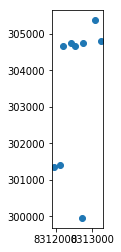

In [84]:
geometry = [Point(xy) for xy in zip(data["Norte inicial"], data["Este inicial"])]
crs = {'init': 'epsg:32719'} #https://www.spatialreferen%matplotlib inline
geo_df = GeoDataFrame(data, crs=crs, geometry=geometry)
geo_df.plot()
# geo_df.to_file(driver='ESRI Shapefile', filename='data.shp')

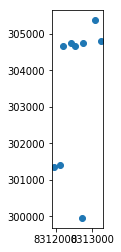

In [85]:
%matplotlib inline
geo_df.plot()

In [0]:
geo_df = geo_df.drop(columns=['Zona'])
gjson = geo_df.to_crs(epsg='32719').to_json()

In [0]:
import folium

In [103]:
import geojson as gj
mapa = folium.Map([8312000, -290999], zoom_start=4, tiles='cartodbpositron')
points = folium.features.GeoJson(gjson)
mapa.add_children(points)
mapa

ImportError: ignored